Step 1: Exploratory Data Analysis (EDA)

Let's start by loading the dataset and performing initial data exploration.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # Set to retina version
pd.set_option('display.max_columns', None) # Set max columns output
warnings.filterwarnings('ignore')

Overview of the Data Set

In [10]:
df = pd.read_csv("employee_attrition_dataset.csv")
print(df.shape)
display(df.head())

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


By overview of data set, it can be found that this data set include 1470 observations and 35 features. But feature 'Over18', 'EmployeeCount' and 'StandardHours' are exactly same in every rows and 'EmployeeNumber' is the number that tag employees so we decide to drop these columns.

In [11]:
df = df.drop(columns=['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'])

According to description page of data set, sign the category of some categorical features.

In [12]:
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
education_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
job_involvement_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
job_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
performance_rating_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
relationship_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
work_life_balance_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
# Use the pandas apply method to numerically encode our attrition target variable
df['Education'] = df["Education"].apply(lambda x: education_map[x])
df['EnvironmentSatisfaction'] = df["EnvironmentSatisfaction"].apply(lambda x: education_satisfaction_map[x])
df['JobInvolvement'] = df["JobInvolvement"].apply(lambda x: job_involvement_map[x])
df['JobSatisfaction'] = df["JobSatisfaction"].apply(lambda x: job_satisfaction_map[x])
df['PerformanceRating'] = df["PerformanceRating"].apply(lambda x: performance_rating_map[x])
df['RelationshipSatisfaction'] = df["RelationshipSatisfaction"].apply(lambda x: relationship_satisfaction_map[x])
df['WorkLifeBalance'] = df["WorkLifeBalance"].apply(lambda x: work_life_balance_map[x])

Then check the data set again.

In [13]:
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2


Type of Features
Take a close look at the type of features.

Categorical
    Nominal
        Attrition
        BusinessTravel
        Department
        EducationField
        Gender
        JobRole
        MaritalStatus
        OverTime
        
    Ordinal
        Education
        EnvironmentSatisfaction
        JobInvolvement
        JobLevel
        JobSatisfaction
        PerformanceRating
        RelationshipSatisfaction
        StockOptionLevel
        WorkLifeBalance
        
Numerical
        
    Continuous
        Age
        DailyRate
        DistanceFromHome
        HourlyRate
        MonthlyIncome
        MonthlyRate
        NumCompaniesWorked
        PercentSalaryHike
        TotalWorkingYears
        TrainingTimesLastYear
        YearsAtCompany
        YearsInCurrentRole
        YearsSinceLastPromotion
        YearsWithCurrManager

In [14]:
print("Missing Value:", df.isnull().any().any())

Missing Value: False


This is a complete data set that contain no missing values.

Distribution of Target Variable

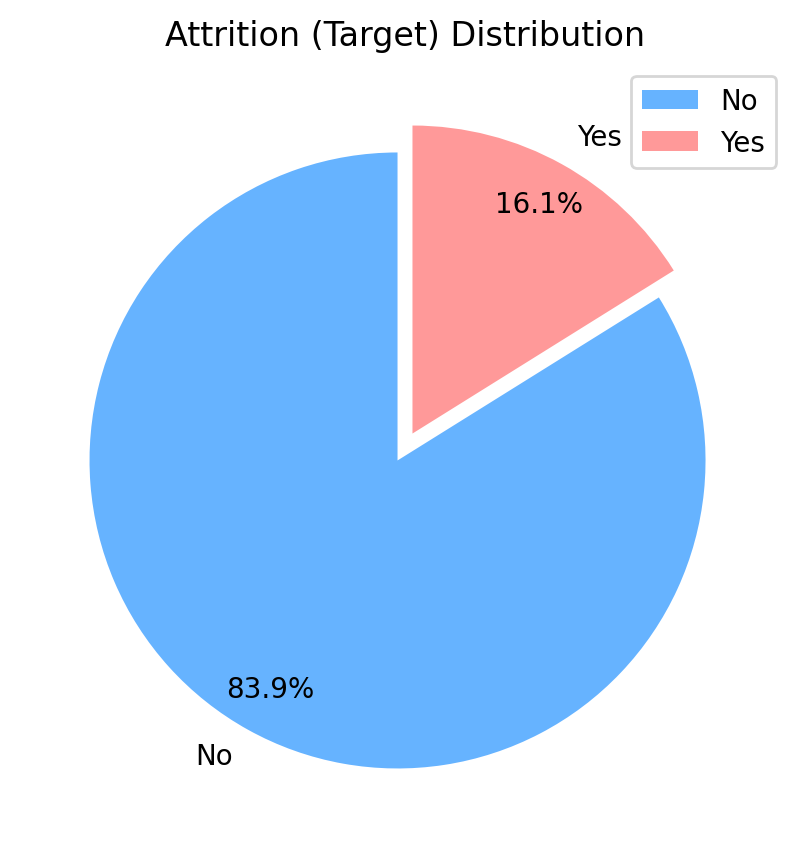

In [15]:
colors = ['#66b3ff', '#ff9999']
explode = (0.05,0.05)
plt.figure(figsize=(5, 5))
plt.pie(df['Attrition'].value_counts(), colors = colors, labels=['No', 'Yes'], 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.legend()
plt.title("Attrition (Target) Distribution")
plt.show()

Note that the distribution of the target variable is quite unbalanced, that is, 16.1% of employees decide to leave but most employees decide to stay. It should be noted that this unbalance may influence the learning model later.

2.2 Frequency Analysis
2.2.1 Frequency Analysis of Numerical Features

The numerical features in these data set are: 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion' and 'YearsWithCurrManager'. Plot the distribution graph of these features and find some pattern.

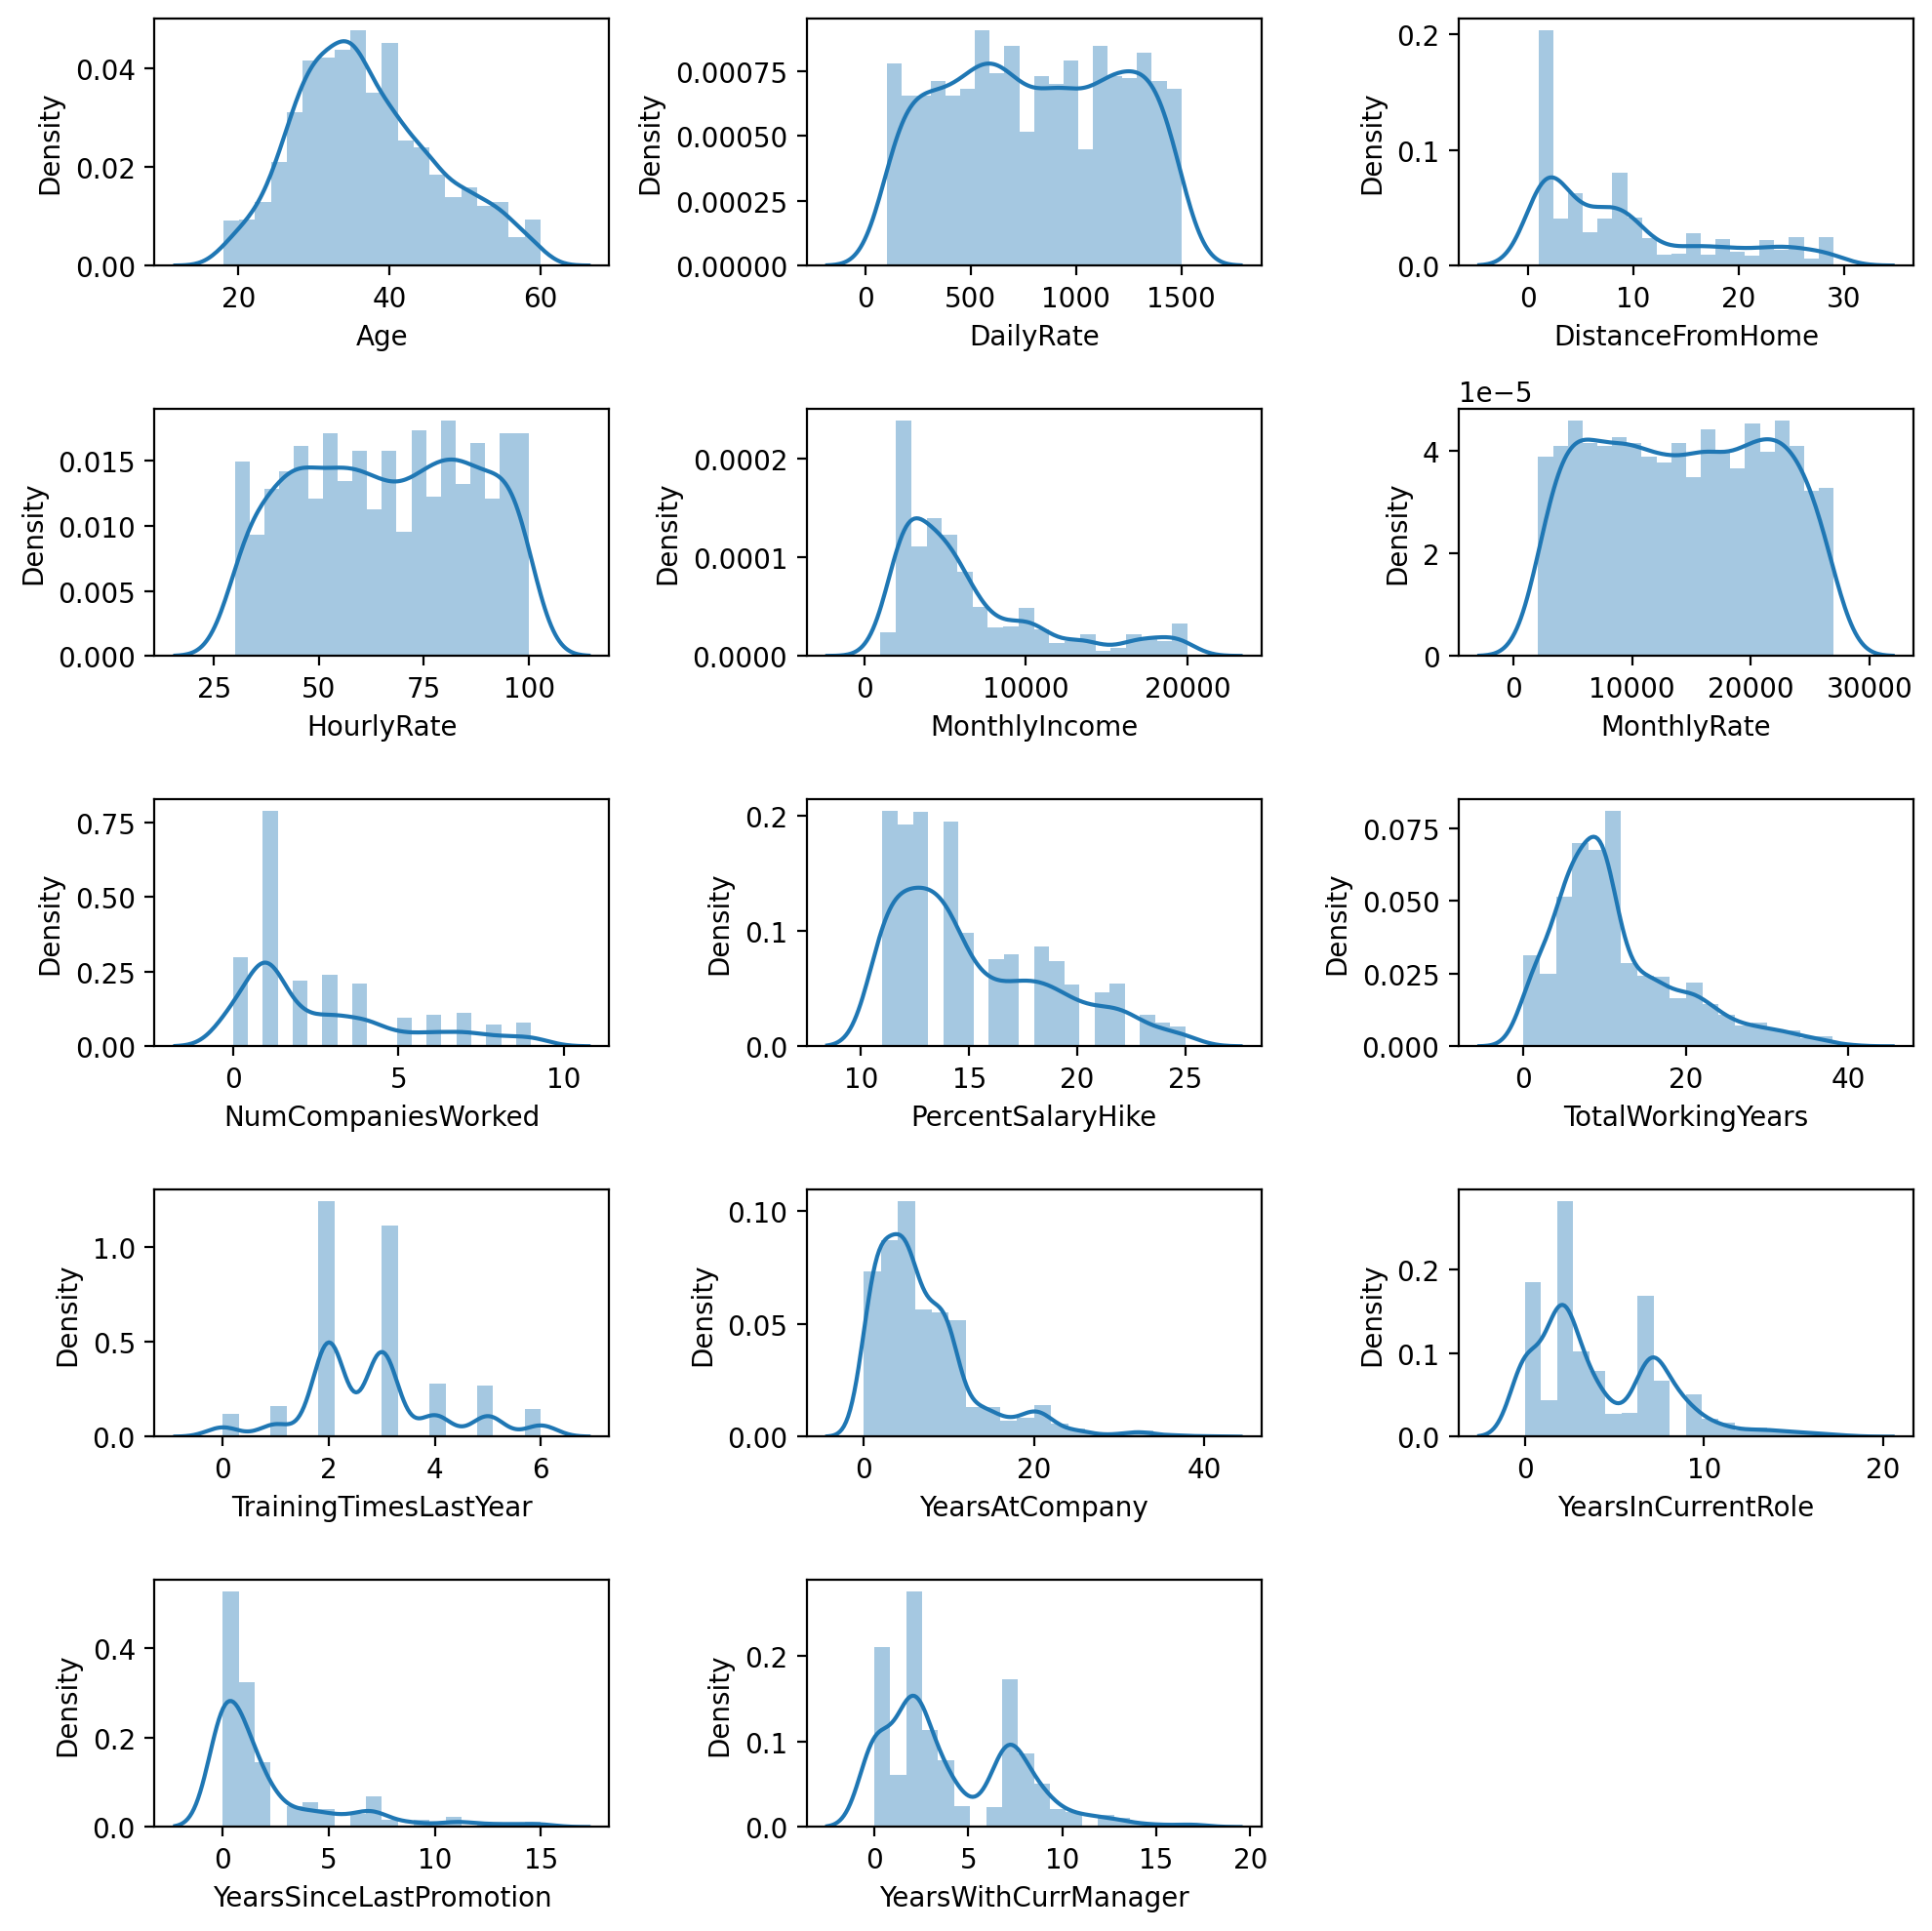

In [16]:
numerical_list = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_list, 1):
    plt.subplot(5, 3, i)
    sns.distplot(df[column], bins=20)
plt.tight_layout()
plt.show()

Findings of Numerical Features;
    Age: The age distribution of this data set distributed normally which cover from 20 to 60. Most employees are 30 to 40.
    DistanceFromHome: Most of employees live close to company which most distance are below 10km.
    MonthlyIncome: The majority of monthly income of employees are centred at around 5000. Only a few of people get high income over 10000.
    NumCompaniesWorked: Most employees only worked for one company.
    TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager: These time type data are right skewed which most of people stay in company only for a few years.
    DailyRate, HourlyRate, MonthlyRate distributed uniformly which the figure is similar in different intervals.

2.2.2 Frequency Analysis of Categorical Features
Categorical features are: 'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole','JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel' and 'WorkLifeBalance'. First, change the type of nominal features to object in order to process frequency analysis, because some classified variables were signed by integer in original data set. Then, browse the frequency of categorical features in data set.

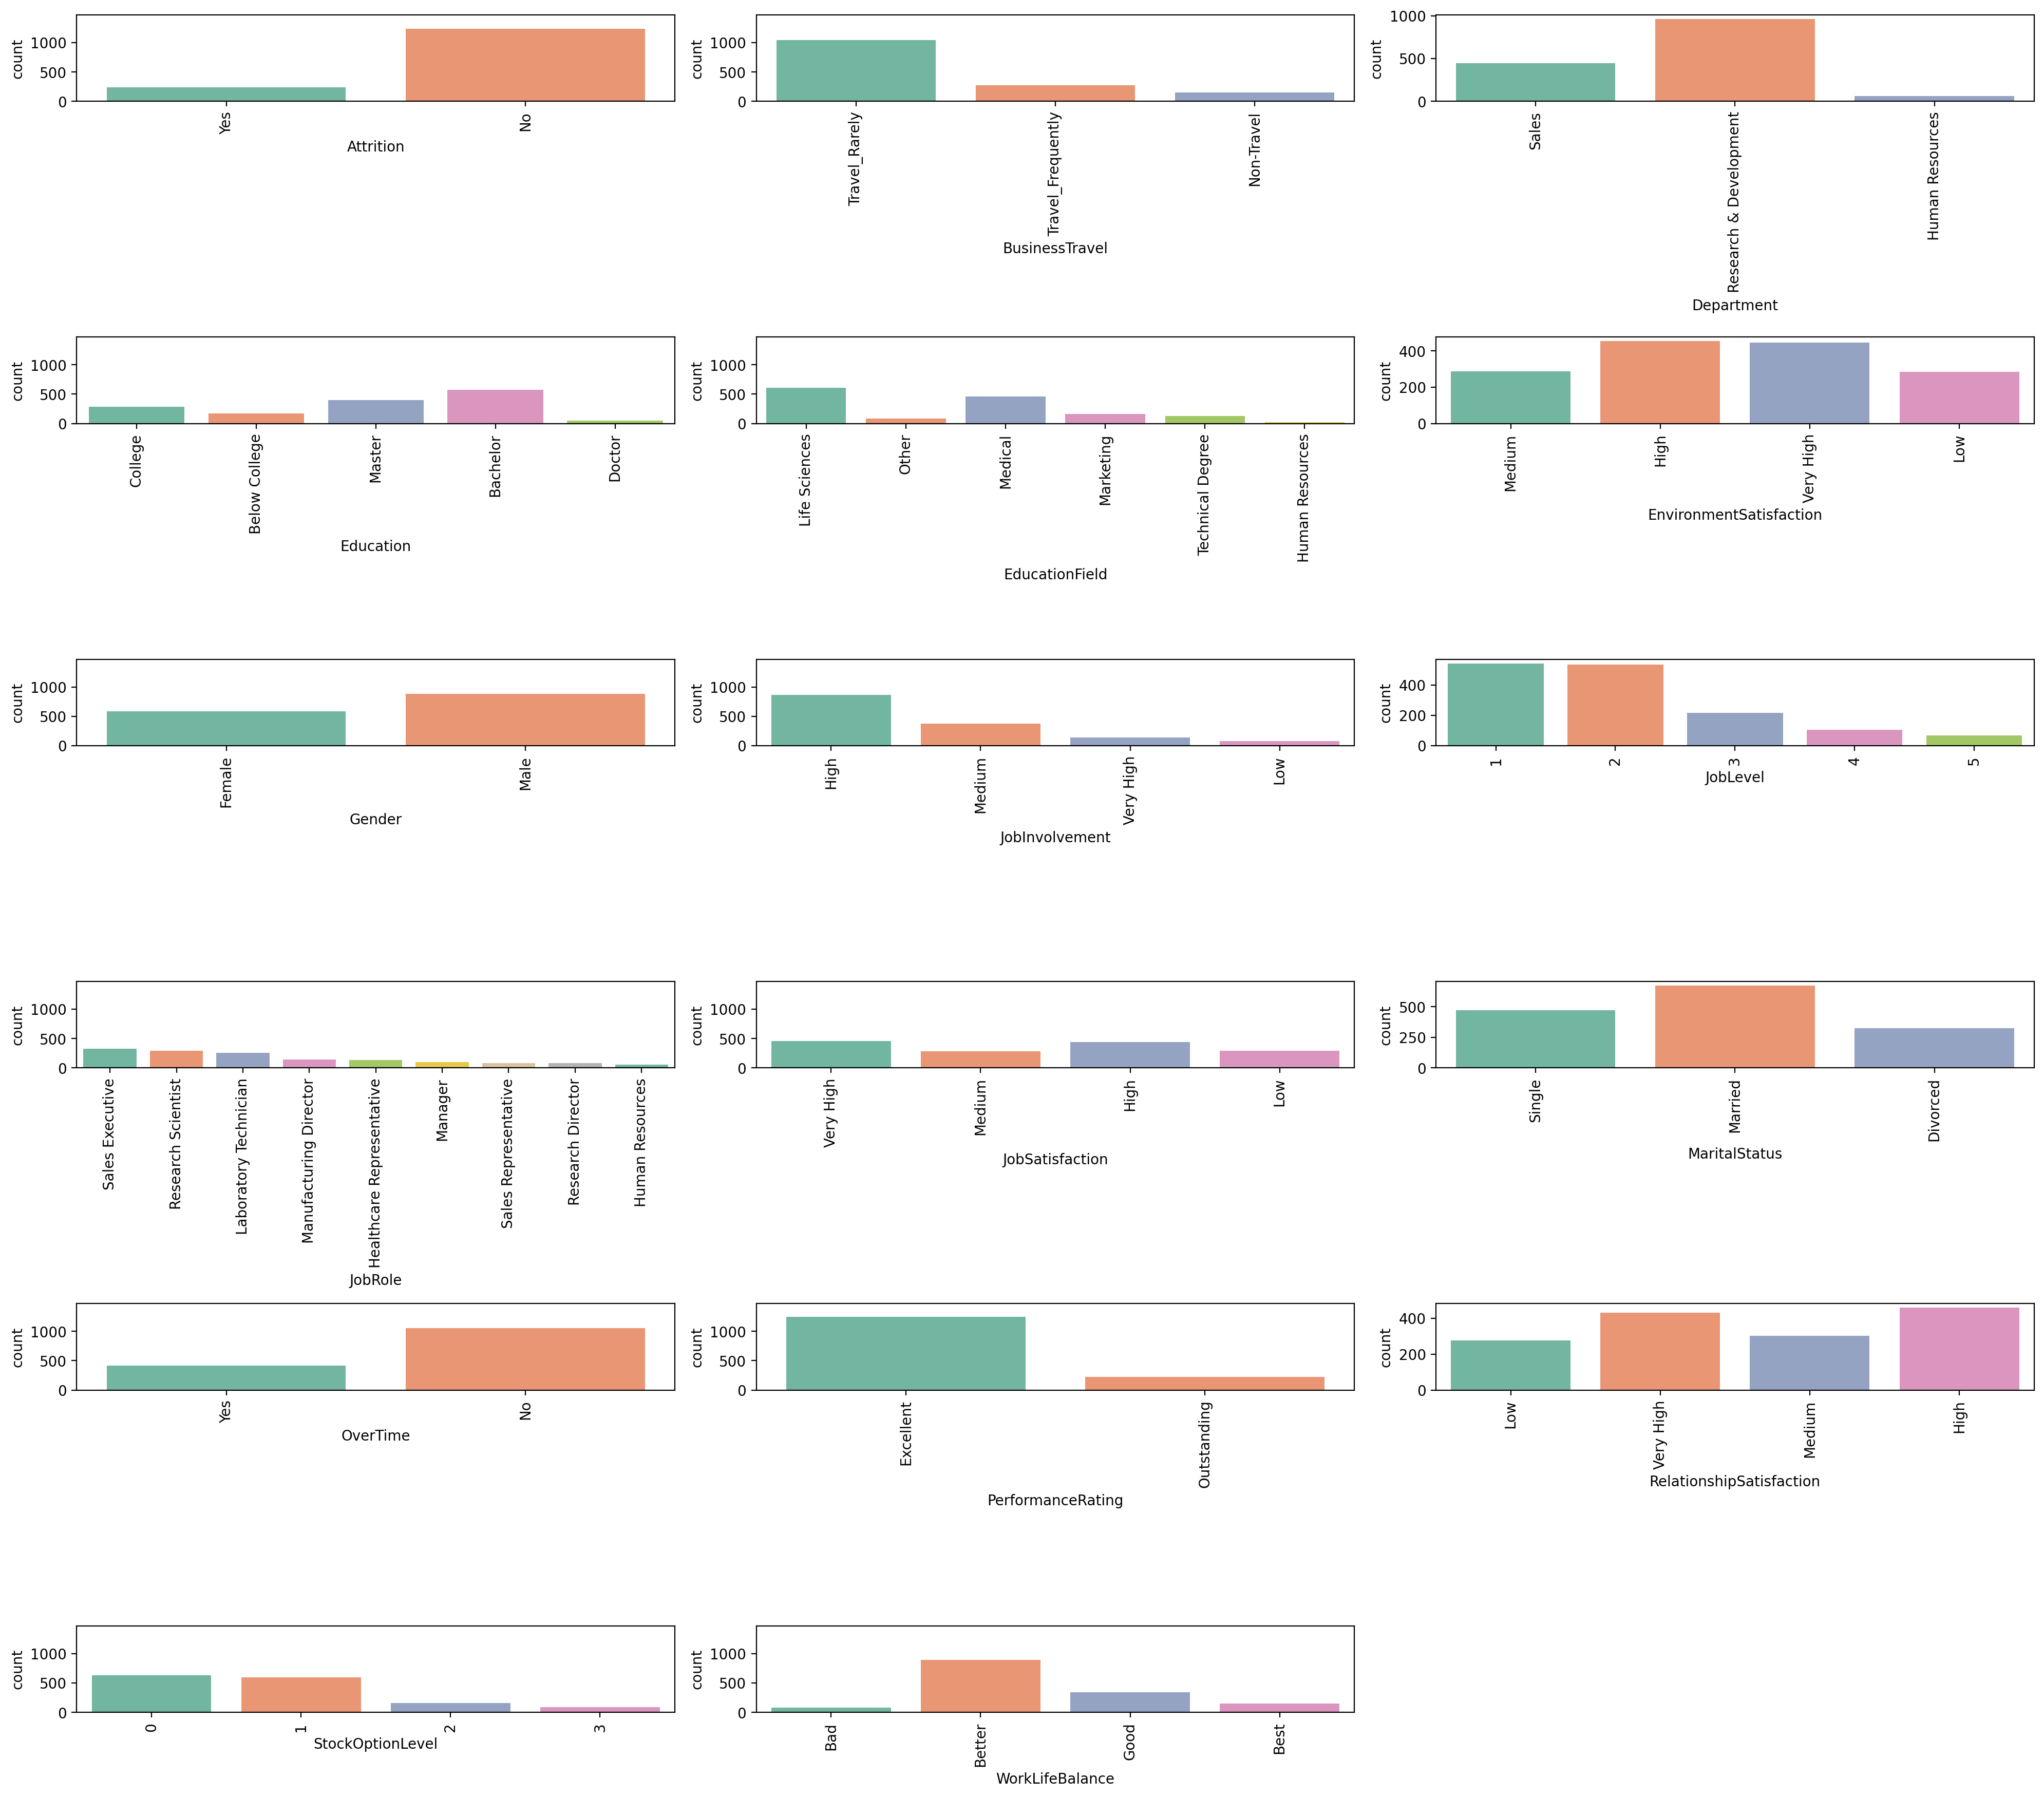

In [17]:
cate_list = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 
             'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
             'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'WorkLifeBalance']

# Create subplots
plt.figure(figsize=(20, 20))
gridspec = plt.GridSpec(7, 3)
locator1, locator2 = [0, 0]

for column in cate_list:
    plt.subplot(gridspec[locator1, locator2])
    sns.countplot(data=df, x=column, palette='Set2')
    plt.xticks(rotation=90)
    
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break

    # Set the y-axis limits to display more values
    plt.ylim(0, len(df))  # You can adjust the range as needed

plt.tight_layout()
plt.show()

Findings of Categorical Features;
    In terms of satisfaction (enviroment, job and relationship satisfaction), most of employees are satisfied, which the number of "3" and "4" indicate high satisfaction are a lot.
    Most employees hold bachelor degree and many people major in life science.
    Since that most of employees are relative new to company, job level 1 is the majority job level.
    Job involment is pretty high among employees.

2.3 Correlation Analysis
Plot correlation matrix by heatmap.

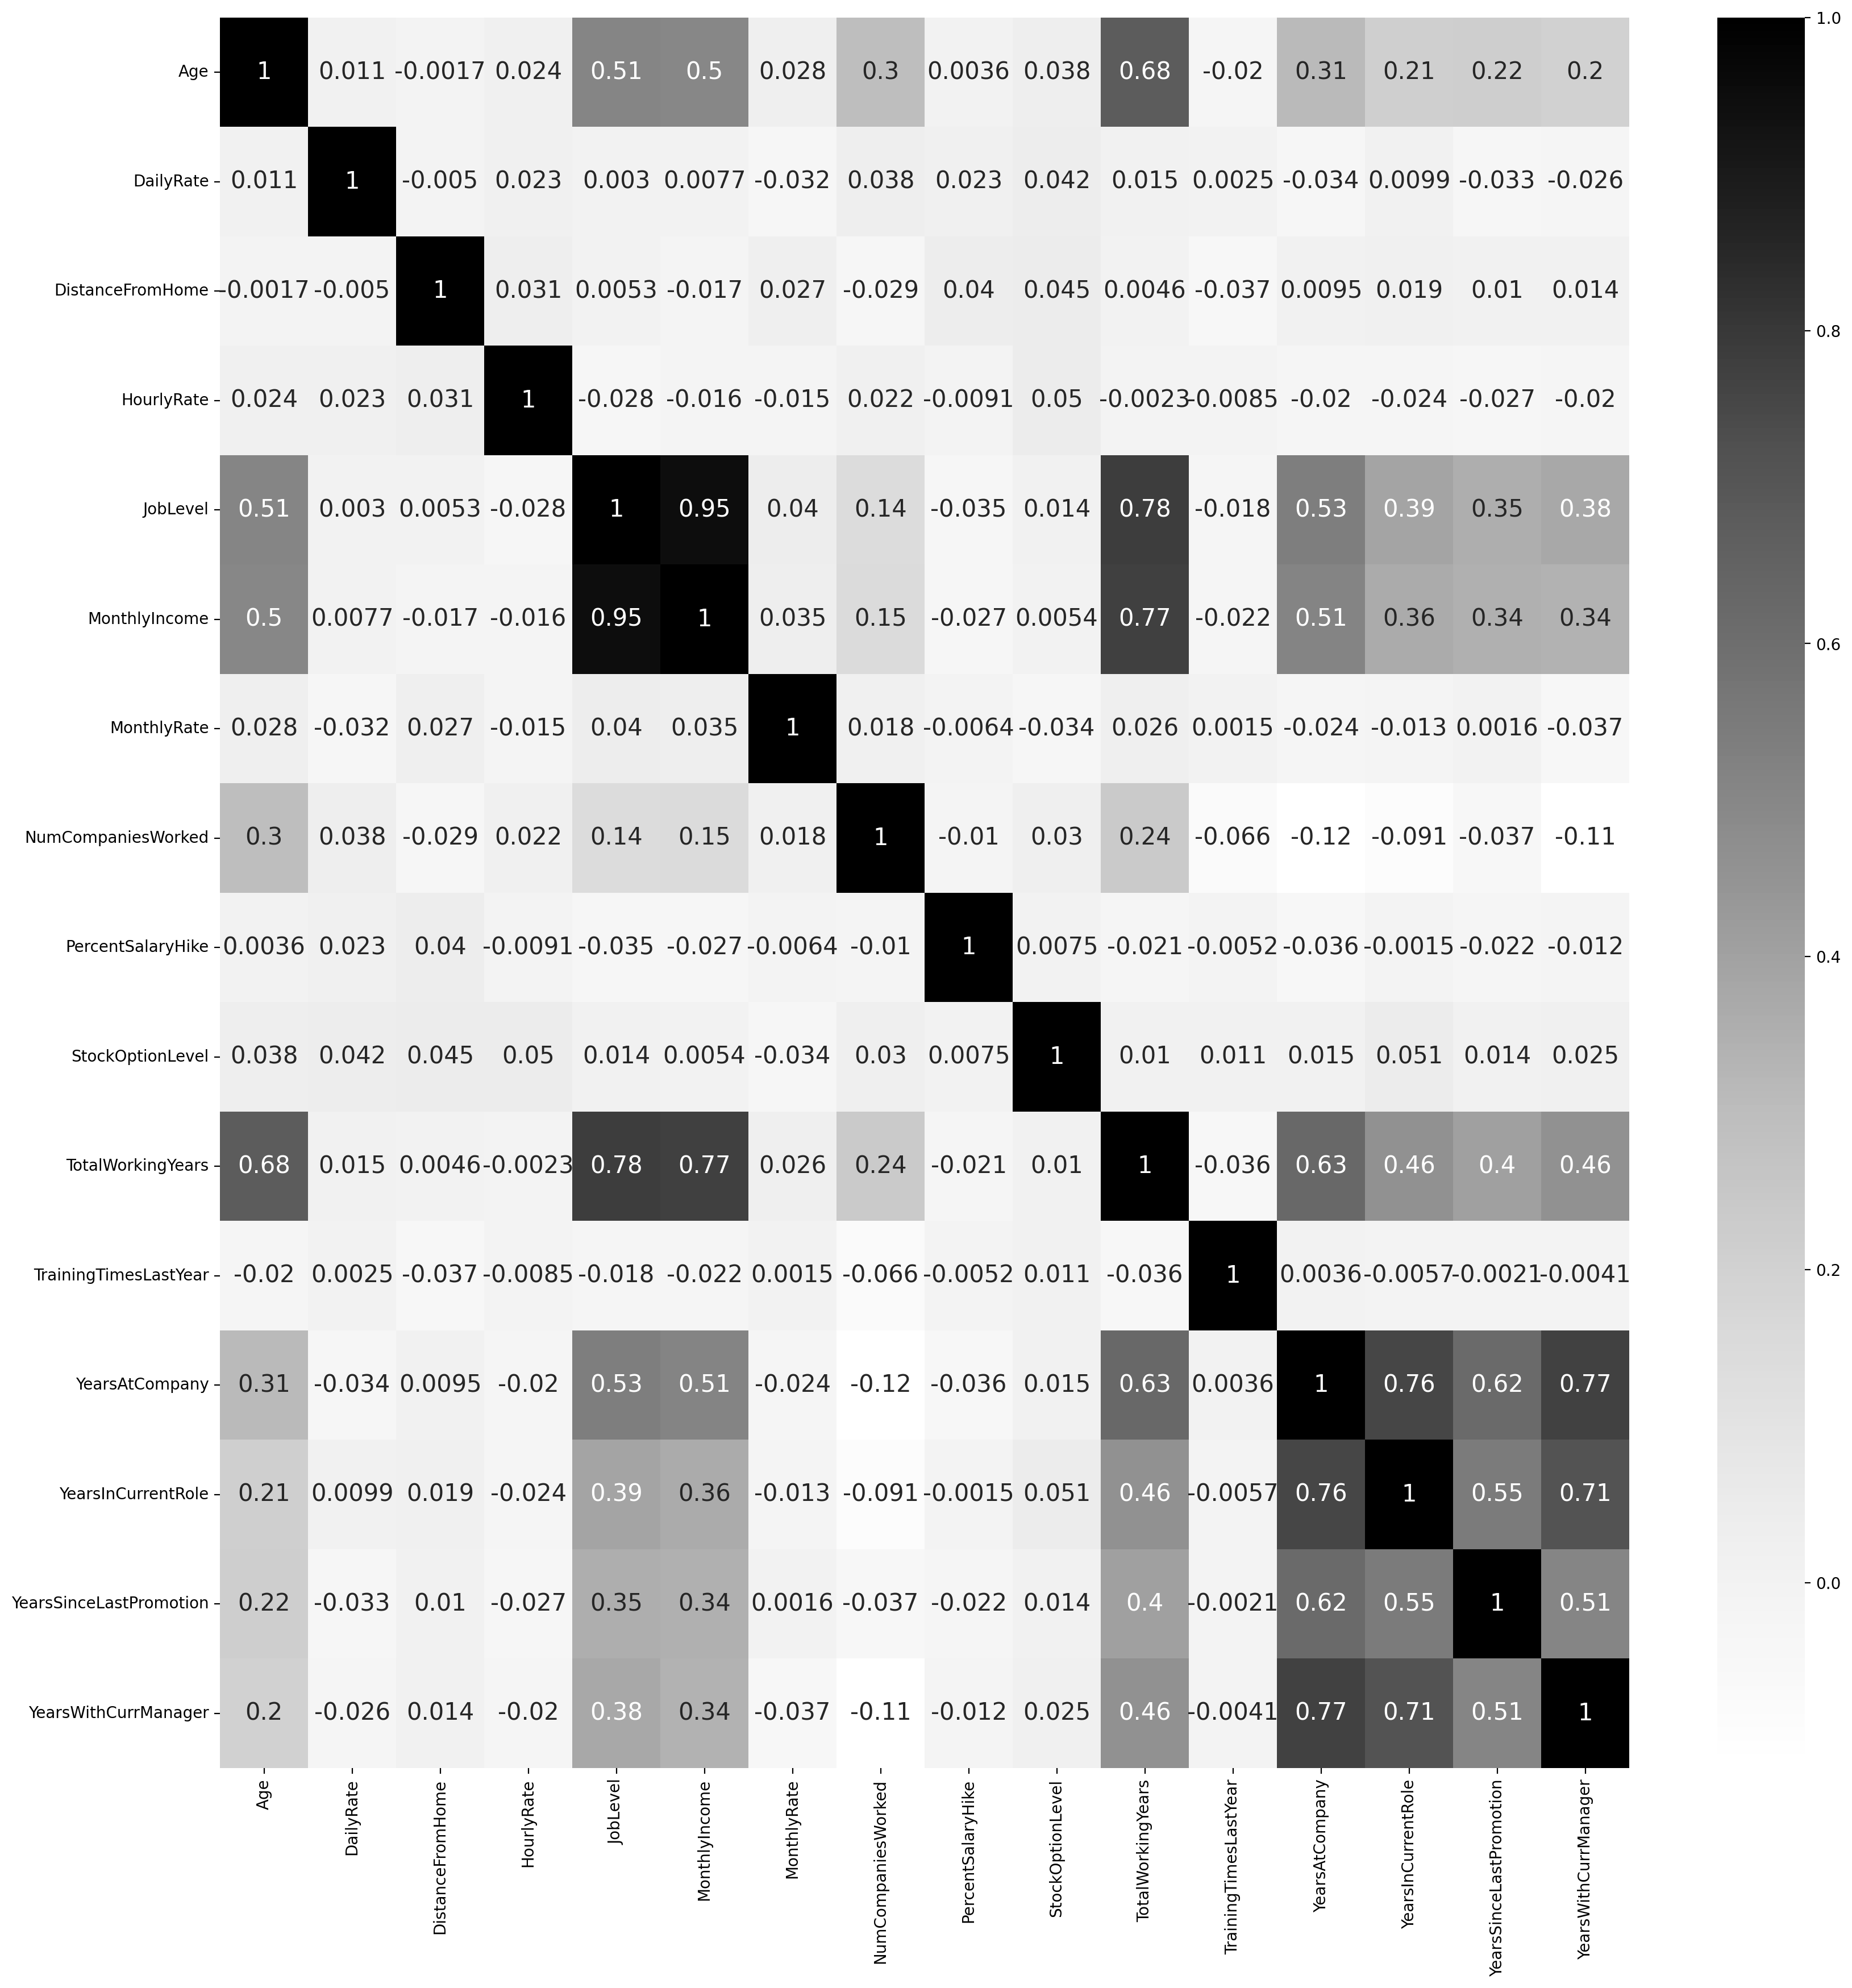

In [18]:
# Filter the DataFrame to include only numeric columns
numeric_columns = df.select_dtypes(include=[int, float])

# Create a correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="Greys", annot_kws={"size": 15})
plt.show()

Findings of Correlation Analysis;
    Time type of features (Years at company, in current role, since last promotion and with current manager) are quite correlated to each other indicated by green zone.
    Besides, totle working year is also correlated to monthly income as we imagined.
    Most of features are not correlated to each other, so we do not have to deal with that. As for time type of features, we will consider that whether to alter them according to the machine learning model.

2.4 Cross Analysis
2.4.1 Cross Analysis between Attrition and Numerical Features

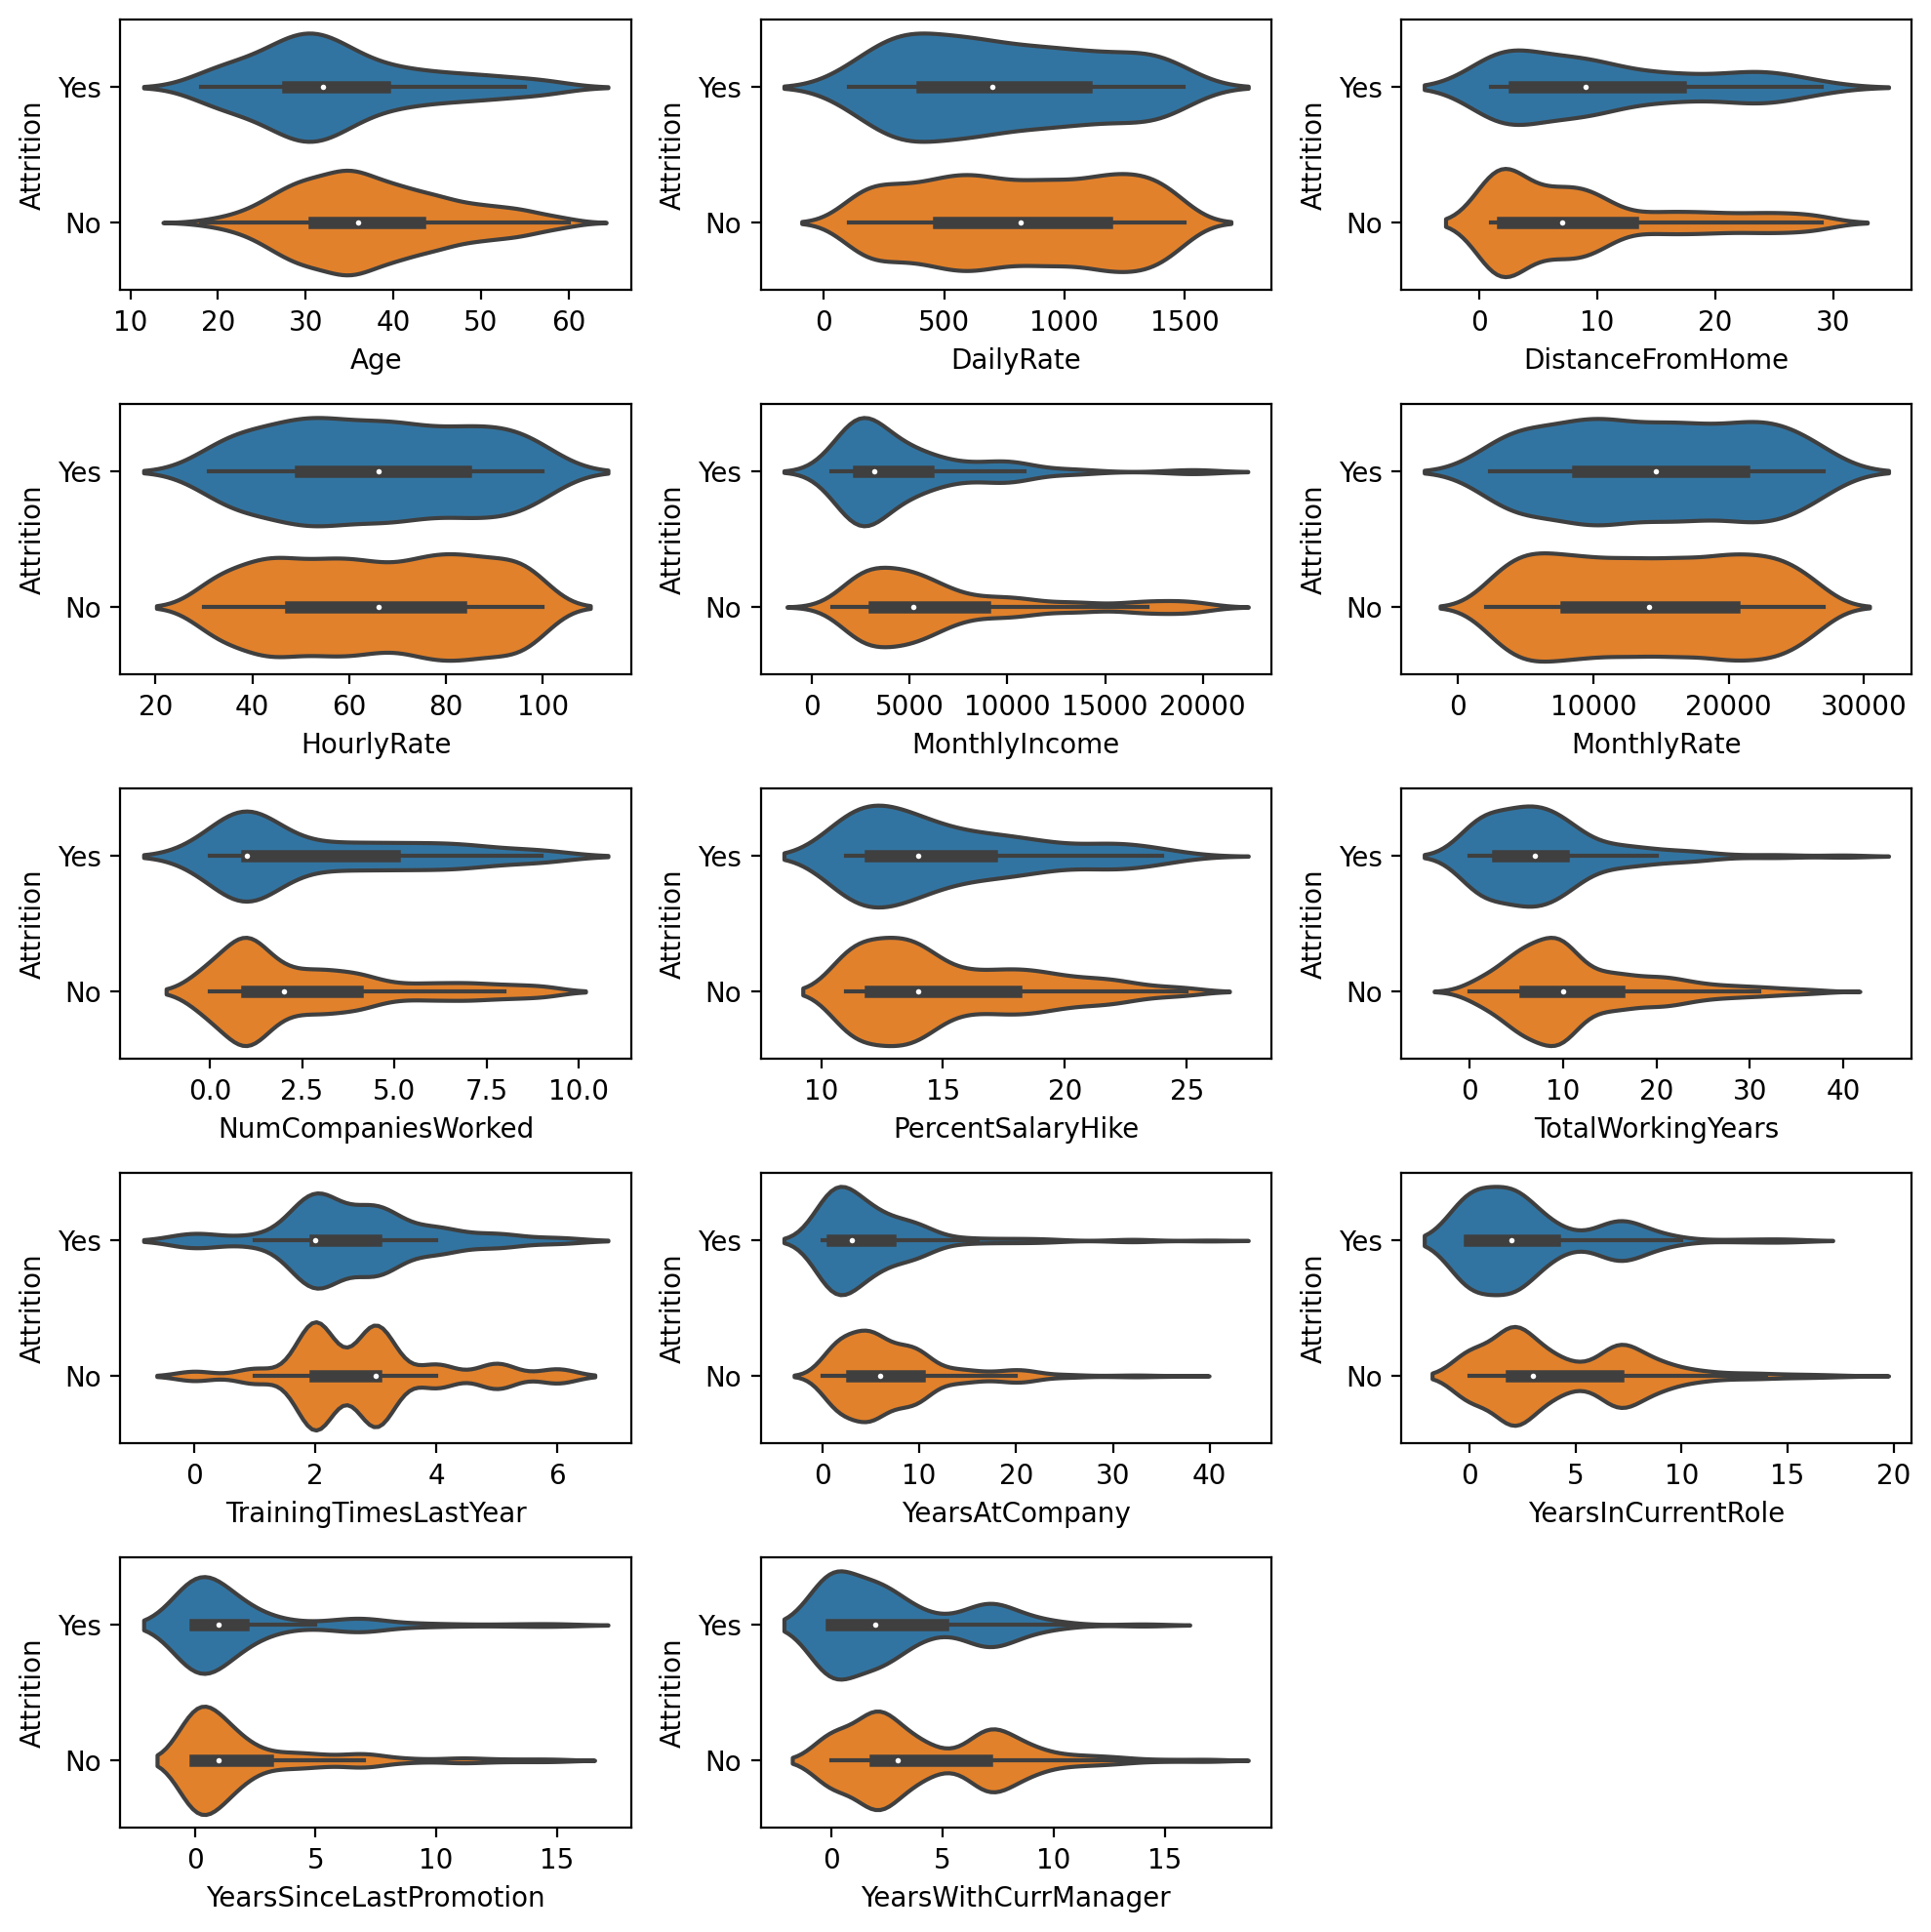

In [19]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_list, 1):
    plt.subplot(5, 3, i)
    sns.violinplot(data=df, x=column, y='Attrition')
plt.tight_layout()
plt.show()

Findings of Cross Analysis between Attrition and Numerical Features
Above violin graph indicate the average value of features and similar information like boxplot. These findings are merely based on superficial results whithout consideration of confounding.

    Age: Younger employees are tend to leave compared to elder employees.
    DistanceFromHome: Those who live far from company have more possibility to leave.
    MonthlyIncome: Most income of attrition employee are below 5000 while those who's income is higher than 5000 tend to stay.
    NumCompaniesWorked, Time type of features: People who worked for many companies and worked for many years are likely to stay.

2.4.2 Cross Analysis between Attrition and Categorical Features

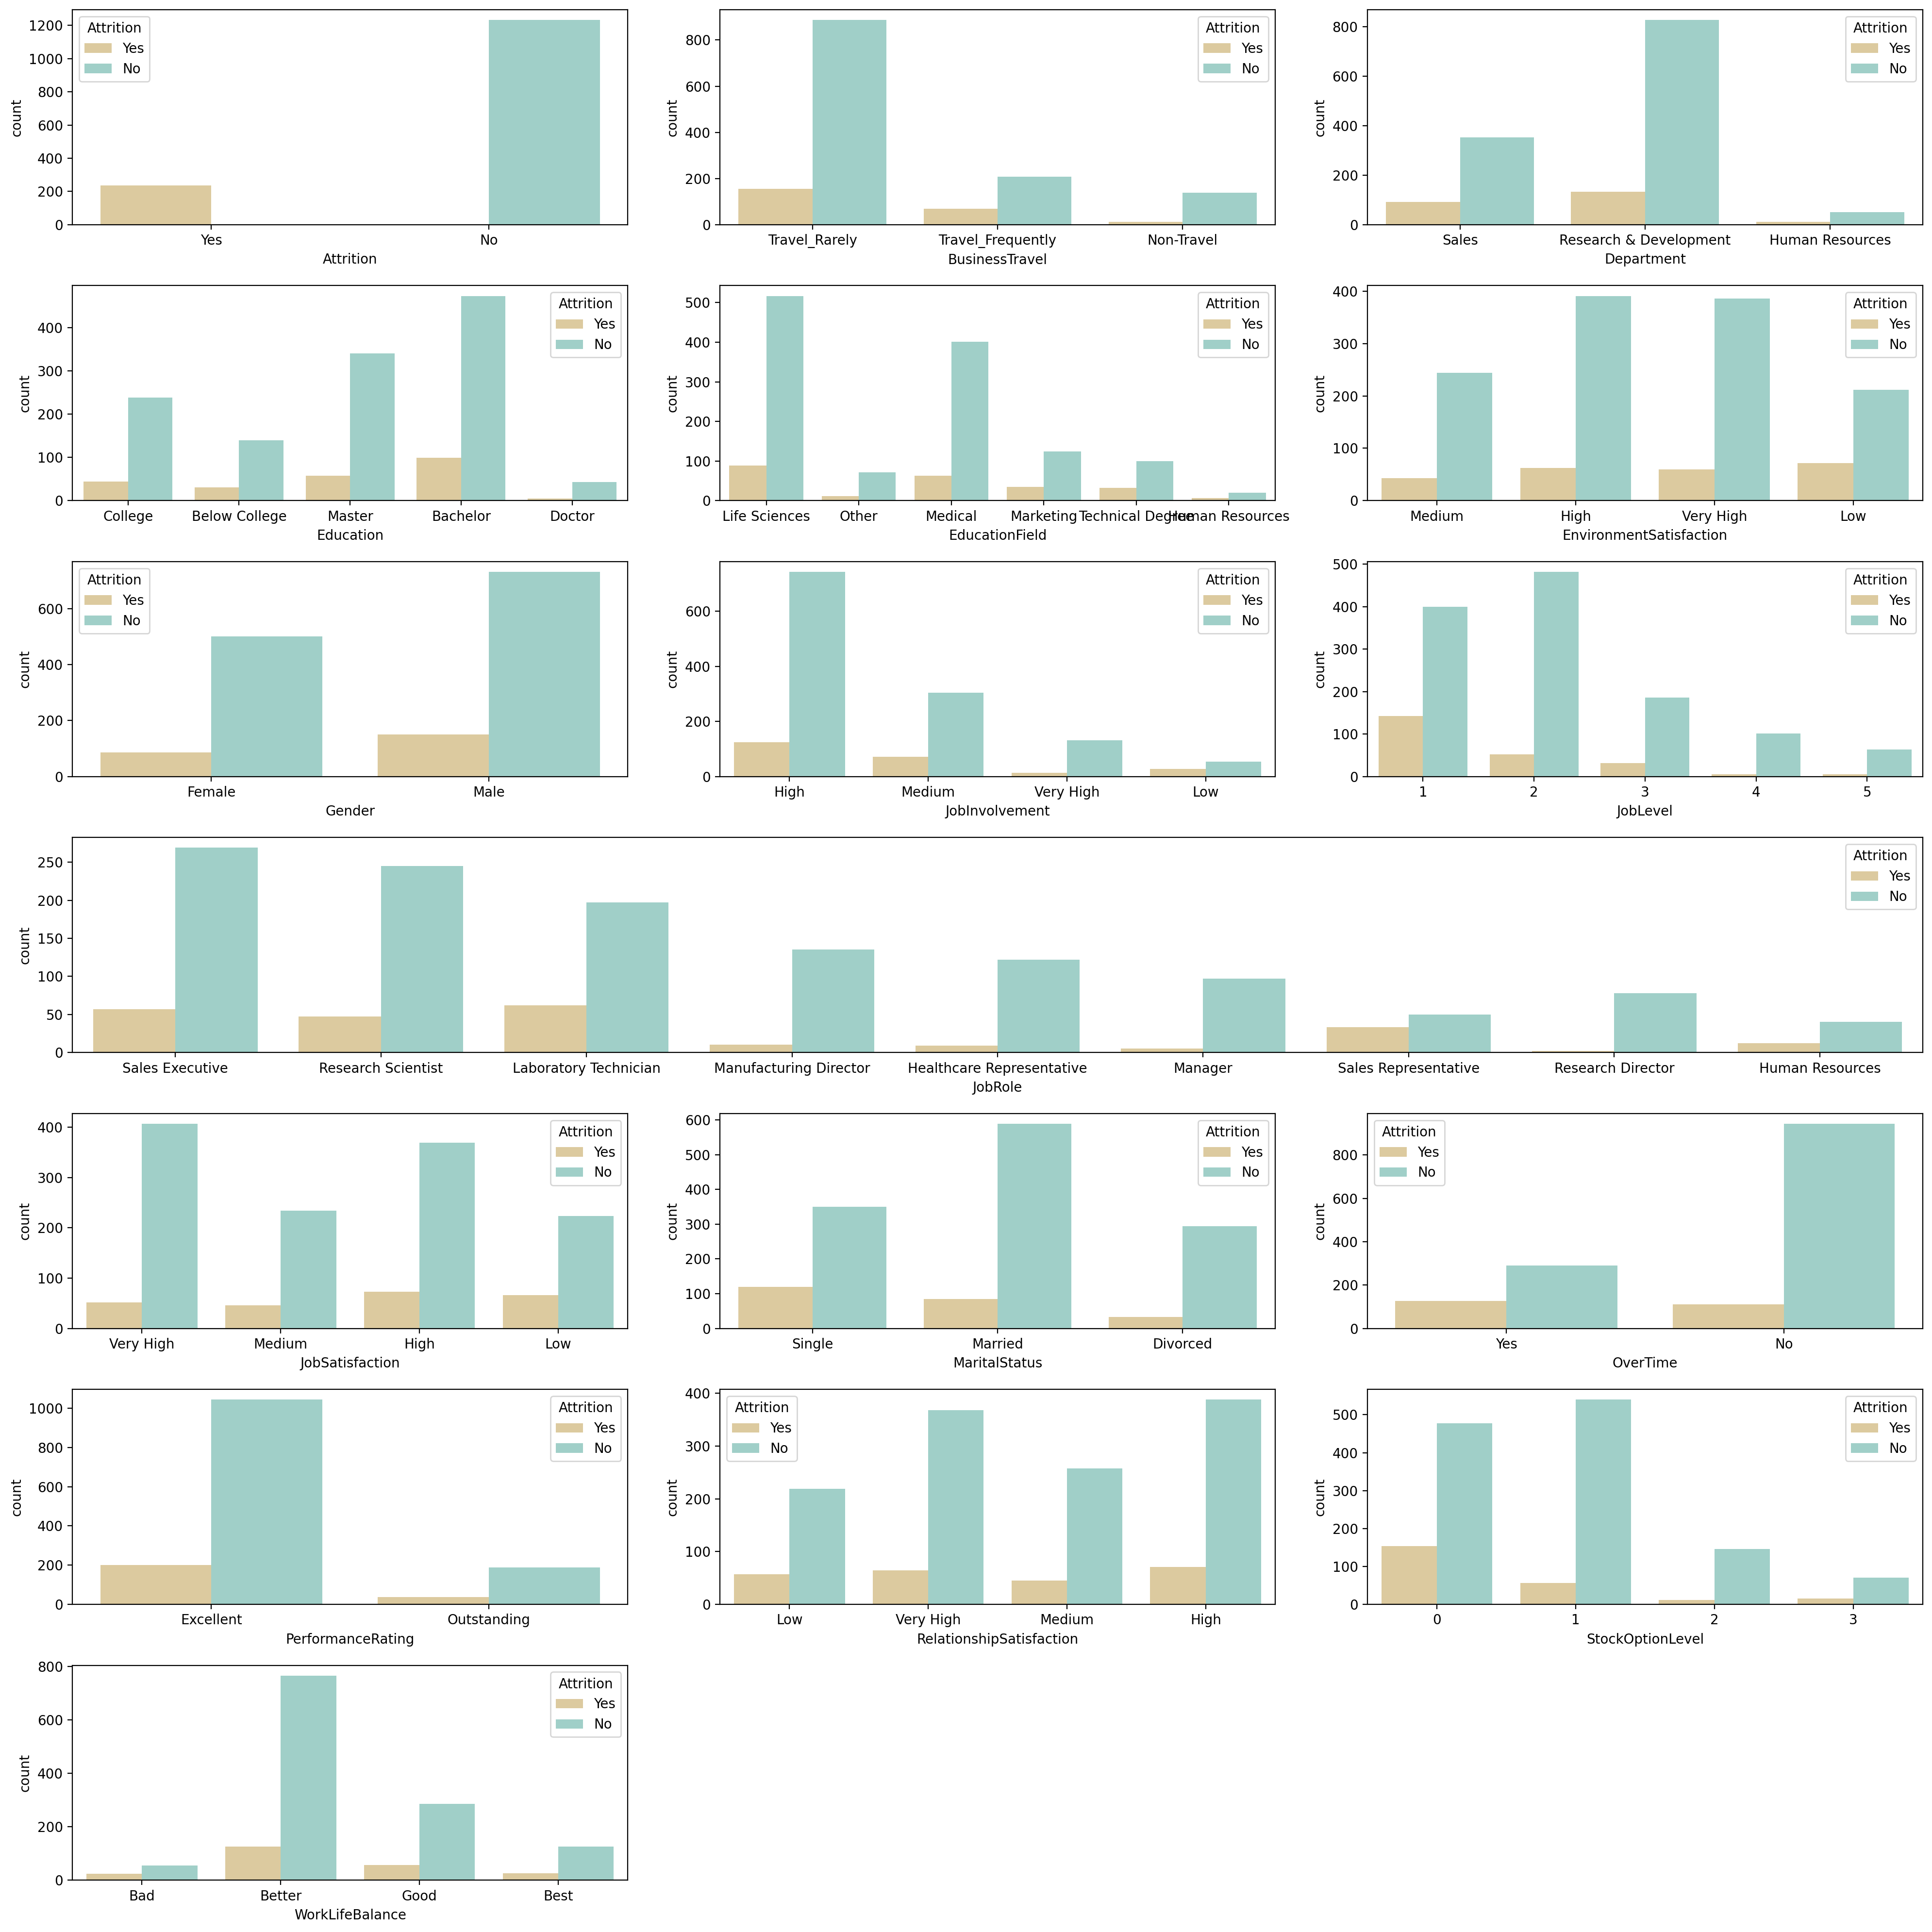

In [20]:
# Create subplots
plt.figure(figsize=(20, 20))
gridspec = plt.GridSpec(7, 3)
locator1, locator2 = [0, 0]

for column in cate_list:
    if column == 'JobRole':
        plt.subplot2grid((7, 3), (locator1, locator2), colspan=3, rowspan=1)
        sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
        locator1 += 1
        locator2 = 0
        continue
    plt.subplot2grid((7, 3), (locator1, locator2))
    sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break
plt.tight_layout()
plt.show()

Findings of Cross Analysis between Attrition and Categorical Features
By comparing between different level among the employees attrition.

    Those who has business travel are more likely leave the company.
    Employees of Human Resource are the most stable group of employees.
    Employees who have Doctor degree are stable.
    Enviroment satisfaction is not related a lot to attrition.
    The higher job level is, the less possibility that employess leave.
    Technical employees are tend to leave.
    Low performance rating and low stock option level may result employees' attrition.

3. Preprocessing and Encoding of Features
After exploration of data, we need to process these features in order to apply them into machine learning models.

3.1 Preprocessing and Encoding of Categorical Features
3.1.1 Label all 'object' type of feature as 'integer'

In [21]:
for cate_features in df.select_dtypes(include='object').columns:
    le = preprocessing.LabelEncoder()
    df[cate_features] = le.fit_transform(df[cate_features])
    print("Origin Classes:", list(le.classes_))

Origin Classes: ['No', 'Yes']
Origin Classes: ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Origin Classes: ['Human Resources', 'Research & Development', 'Sales']
Origin Classes: ['Bachelor', 'Below College', 'College', 'Doctor', 'Master']
Origin Classes: ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Origin Classes: ['High', 'Low', 'Medium', 'Very High']
Origin Classes: ['Female', 'Male']
Origin Classes: ['High', 'Low', 'Medium', 'Very High']
Origin Classes: ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
Origin Classes: ['High', 'Low', 'Medium', 'Very High']
Origin Classes: ['Divorced', 'Married', 'Single']
Origin Classes: ['No', 'Yes']
Origin Classes: ['Excellent', 'Outstanding']
Origin Classes: ['High', 'Low', 'Medium', 'Very High']
Origin Classes: ['Bad', 'Best', 'Better', 'Good']


3.1.2 Dummy Nominal Features
Select those nominal features which have more than two class as dummy variables.

In [22]:
dummies = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(data=df, columns=dummies)
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_0,Department_1,Department_2,EducationField_0,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,JobRole_0,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2
0,41,1,2,1102,1,2,2,0,94,0,2,3,5993,19479,8,1,11,0,1,0,8,0,0,6,4,0,5,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,0,1,279,8,1,0,1,61,2,2,2,5130,24907,1,0,23,1,3,1,10,3,2,10,7,1,7,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,2,1373,2,2,3,1,92,2,1,0,2090,2396,6,1,15,0,2,0,7,3,2,0,0,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,0,1,1392,3,4,3,0,56,0,1,0,2909,23159,1,1,11,0,0,0,8,3,2,8,7,3,0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,0,2,591,2,1,1,1,40,0,1,2,3468,16632,9,0,12,0,3,1,6,3,2,2,2,2,2,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


3.2 Preprocessing and Encoding of Numerical Features

3.2.1 Scaling Numerical Features
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

Z=(X−μ)/S

In [23]:
std = preprocessing.StandardScaler()
scaled = std.fit_transform(df[numerical_list])
scaled = pd.DataFrame(scaled, columns=numerical_list)
for i in numerical_list:
    df[i] = scaled[i]
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_0,Department_1,Department_2,EducationField_0,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,JobRole_0,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2
0,0.446350,1,2,0.742527,-1.010909,2,2,0,1.383138,0,2,3,-0.108350,0.726020,2.125136,1,-1.150554,0,1,0,-0.421642,-2.171982,0,-0.164613,-0.063296,-0.679146,0.245834,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,1.322365,0,1,-1.297775,-0.147150,1,0,1,-0.240677,2,2,2,-0.291719,1.488876,-0.678049,0,2.129306,1,3,1,-0.164511,0.155707,2,0.488508,0.764998,-0.368715,0.806541,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,0.008343,1,2,1.414363,-0.887515,2,3,1,1.284725,2,1,0,-0.937654,-1.674841,1.324226,1,-0.057267,0,2,0,-0.550208,0.155707,2,-1.144294,-1.167687,-0.679146,-1.155935,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,-0.429664,0,1,1.461466,-0.764121,4,3,0,-0.486709,0,1,0,-0.763634,1.243211,-0.678049,1,-1.150554,0,0,0,-0.421642,0.155707,2,0.161947,0.764998,0.252146,-1.155935,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,-1.086676,0,2,-0.524295,-0.887515,1,1,1,-1.274014,0,1,2,-0.644858,0.325900,2.525591,0,-0.877232,0,3,1,-0.678774,0.155707,2,-0.817734,-0.615492,-0.058285,-0.595227,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


4. Model Selection
After dummy process and standardized numerical feature. We split the data set into training set and test set with ratio 8:2. Then, duplicate the training set to:

Type1: original size of training set;
Type2: Oversampled size of training set. Decide to use which version of training set by comparing the performance of each one after implementing a machine learning model.
Moreover, this report used Grid search which is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified. First, choose some of classifying machine learning model as candidates. We put a customized list of parameters into grid to search out an optimized model under cv equals to 5. Then apply this trained model to test set. Evaluate the performance and compare them between different models.

In [25]:
!pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.6 kB 1.3 MB/s eta 0:00:01
   ---------- ---------------------------- 61.4/235.6 kB 812.7 kB/s eta 0:00:01
   -------------------- ------------------- 122.9/235.6 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------  235.5/235.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.3 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from subprocess import call
from IPython.display import Image 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.
Define a function to output the confusion matrix after building the model.

In [36]:
def my_confusion_matrix(test, test_pred):
    cf = pd.DataFrame(confusion_matrix(test, test_pred), 
                      columns=['Predicted NO', 'Predicted Yes'], 
                      index=['True No', 'True Yes'])
    report = pd.DataFrame(classification_report(test, test_pred, target_names=['No', 'Yes'], 
                                                        output_dict=True)).round(2).transpose()
    display(cf)
    display(report)

In [37]:
def plot_roc_curve(model, y, x):
    tree_auc = roc_auc_score(y, model.predict(x))
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % tree_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.fill_between(fpr, tpr, color='orange', alpha=0.2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

Split the data set into traning set and test set with ratio 8:2

Duplicate the training set which:
    Original size of training set
    Oversampled size of training set
Decide to use which version of training set before implementing a machine learning model.

In [40]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
oversampler = SMOTE(random_state=0)
smote_X_train, smote_y_train = oversampler.fit_resample(X_train, y_train)

After oversampling, the scale of data set changed to following.

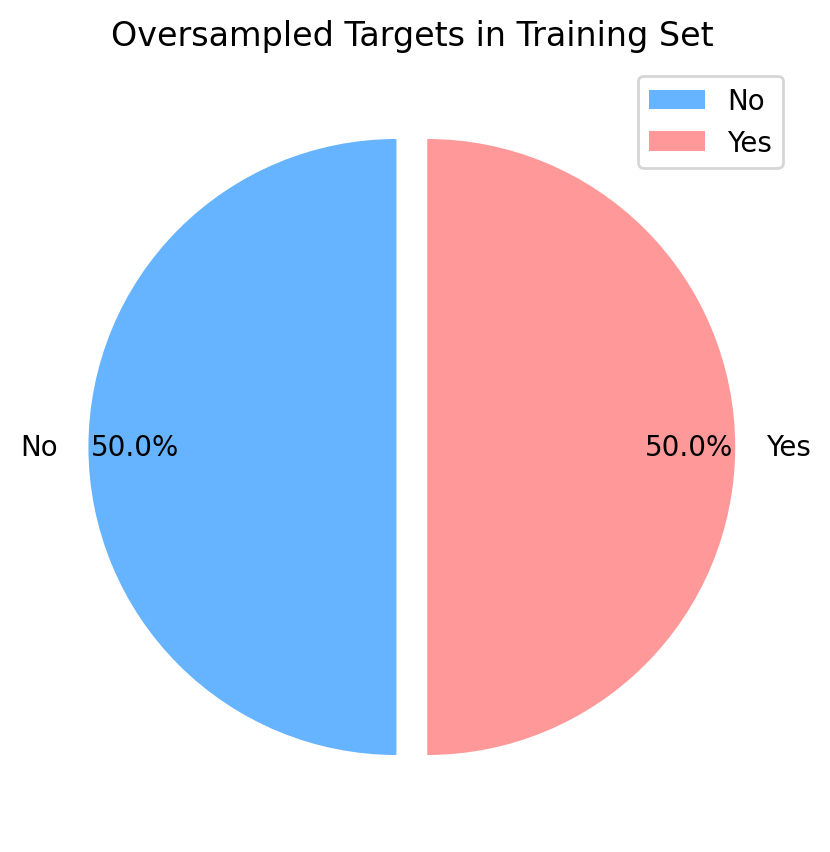

In [41]:
colors = ['#66b3ff', '#ff9999']
explode = (0.05,0.05)
plt.figure(figsize=(5, 5))
plt.pie(pd.Series(smote_y_train).value_counts(), colors = colors, labels=['No', 'Yes'], 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.legend()
plt.title("Oversampled Targets in Training Set")
plt.show()

4.1 Decision Tree

In [42]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

4.1.1 Decision Tree

In [43]:
params = {"criterion": ("gini", "entropy"), 
          "splitter": ("best", "random"), 
          "max_depth": np.arange(1, 20), 
          "min_samples_split": [2, 3, 4], 
          "min_samples_leaf": np.arange(1, 20)}
tree1_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), params, scoring="roc_auc", n_jobs=-1, cv=5)
tree1_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='roc_auc')